In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.interpolate import Rbf

from code.featurize import featurizer, bin_interpolate
from code.makedbs import get_db

# Walkscore: standard

In [3]:
f = featurizer()
f.add_features(['walkscore'])

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


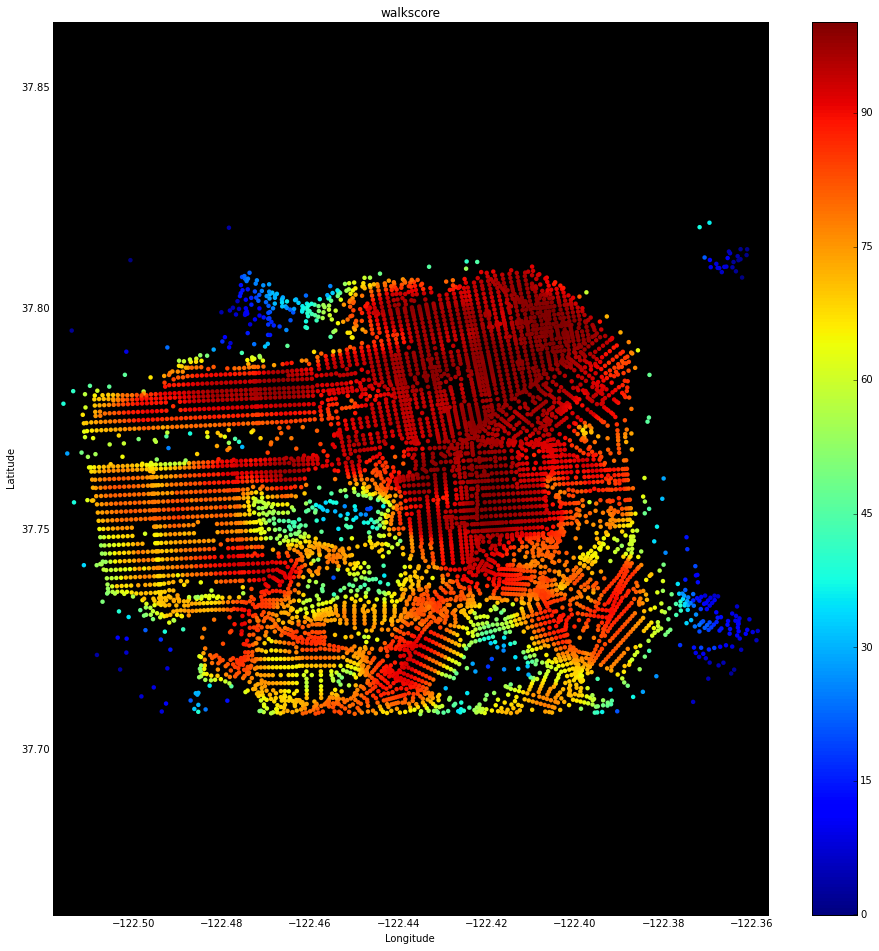

In [4]:
f.plot(['walkscore'])

# population

In [5]:
db = get_db('usc_pop')
db.head()

,block,block_group,tract,id2,total
0,101,1,1000,60750101001000,0
1,101,1,1001,60750101001001,44
2,101,1,1002,60750101001002,0
3,101,1,1003,60750101001003,0
4,101,1,1004,60750101001004,1


In [6]:
f.add_features(['usc_pop'])

In [20]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.population,
          function='linear', smooth=0.1)
f.features['popsmooth'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.7 s, sys: 6.36 s, total: 31.1 s
Wall time: 21.6 s


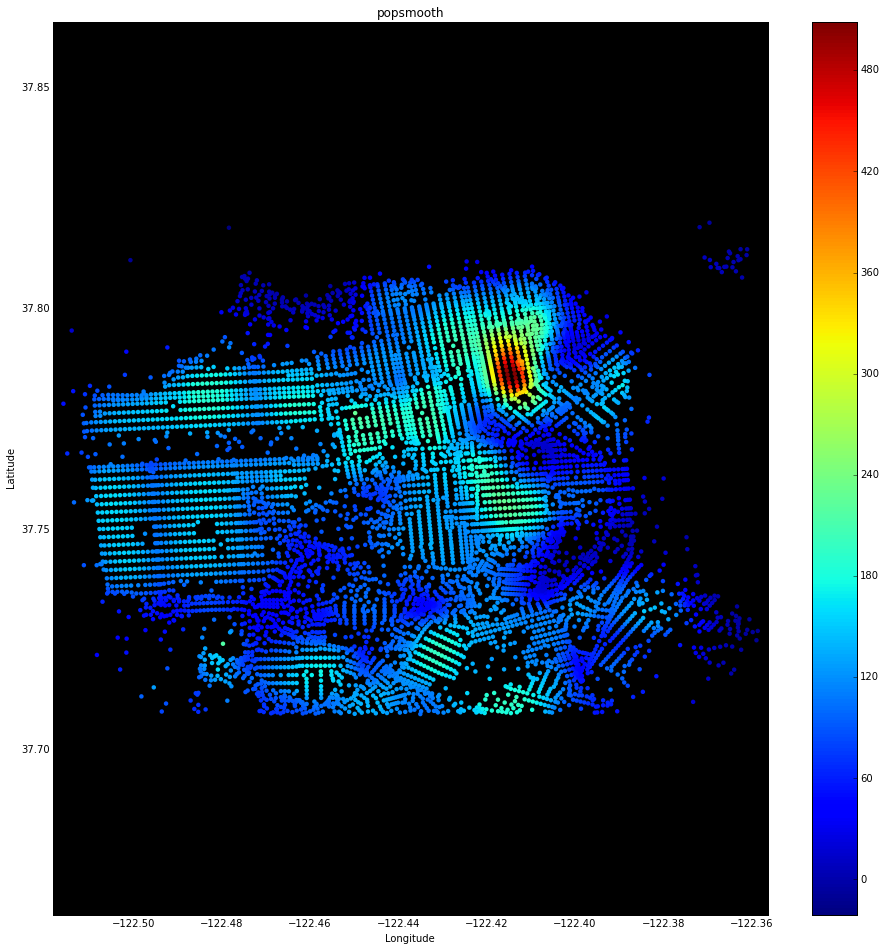

In [21]:
f.plot(['popsmooth'])
# plt.clim(0, 500)